In [29]:
import torch
import csv

def csv_to_list(csv_reader_object, list_object):
    for row in csv_reader_object:
        full_row = []
        for i in range(4):
            col = row[i].replace('(', '')
            col = col.replace(')', '')
            col = col.replace(',', ' ')
            col = col.split()
            full_row += [float(col[j]) for j in range(2)]
        list_object += [full_row]
        
interface = []
solution = []
target = []

with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface)
        
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/solution_0_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution)
                
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_3_training.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, target)
        
        
interface = torch.Tensor(interface)
#print(interface)

solution = torch.Tensor(solution)
#print(solution)

inp = torch.cat((interface, solution), 1)
#inp = solution
print(inp.size())

target = torch.Tensor(target)
#target += interface
print(target.size())
#print(inp)

torch.Size([384, 16])
torch.Size([384, 8])


In [30]:
interface_test = []
solution_test = []
target_test = []

with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_1_test.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_test)
        
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/solution_0_1_test.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution_test)
                
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_3_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, target_test)
    
        
interface_test = torch.Tensor(interface_test)
#print(interface_test)

solution_test = torch.Tensor(solution_test)
#print(solution_test)

inp_test = torch.cat((interface_test, solution_test), 1)
#inp_test = solution_test
print(inp_test.size())

target_test = torch.Tensor(target_test)
#target_test += interface_test
print(target_test.size())
#print(inp_test)

torch.Size([64, 16])
torch.Size([64, 8])


In [62]:
import torch.nn as nn
import torch.nn.functional as F

class Maxwell(nn.Module): #Definition des Netzes
    def __init__(self): #Deklarierung der Anzahl an Layern und Neuronen
        super(Maxwell, self).__init__()
        self.lin1 = nn.Linear(16, 500) #Input-Layer: 1 Neuron, 1. Hidden-Layer: 100 Neuronen
        self.lin2 = nn.Linear(500, 8) #2. Hidden-Layer: 50 Neuronen
        #self.lin3 = nn.Linear(100, 8) #Output-Layer: 1 Neuron
        
    def forward(self, x): #Deklarierung der Aktivierungsfunktionen pro Layer
        x = F.logsigmoid(self.lin1(x)) #Tangens Hyperbolicus
        x = self.lin2(x) #Identität
        #x = self.lin3(x) 
        return x
            
net = Maxwell() #Initialisierung des Netzes
print(net) #Ausgabe des Netzes

#print(net(inp))

Maxwell(
  (lin1): Linear(in_features=16, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=8, bias=True)
)


In [64]:
import torch.optim as optim
import time

start_time = time.time()

tol = 1e-5
max_iter = 1000
iterations = 0 #Anzahl der Trainingsschritte
loss = tol + 1

optimizer = optim.Adam(net.parameters(), lr=1e-5) #Wahl des Optimierungsverfahrens (hier: Adam) 
                                                   #inkl. Lernrate
criterion = nn.MSELoss() #Wahl der Errorfunktion (hier: MSE)

while(iterations < max_iter and loss > tol): #Training
    
    out = net(inp)

    optimizer.zero_grad()
    loss = criterion(out, target) #Berechnung des Fehlers
    loss_test = criterion(net(inp_test), target_test)
    print("Loss: %.5f" % loss, "Test-Loss: %.5f" % loss_test, "Iterations: %.0f" % (iterations+1)) #Ausgabe des Fehlers

    loss.backward() #Berechnung der Ableitung des Fehlers
    optimizer.step() #Optimierung der Netzparameter
    iterations += 1

print("Final Loss: %.5f" % loss) #Ausgabe des Fehlers nach dem Training

print("Number of iterations: %.0f" % iterations)

time_taken = time.time() - start_time
print("Run-Time: %.4f s" % time_taken) #Ausgabe der Laufzeit

Loss: 0.40842 Test-Loss: 0.12796 Iterations: 1
Loss: 0.40832 Test-Loss: 0.12817 Iterations: 2
Loss: 0.40822 Test-Loss: 0.12746 Iterations: 3
Loss: 0.40813 Test-Loss: 0.12819 Iterations: 4
Loss: 0.40804 Test-Loss: 0.12839 Iterations: 5
Loss: 0.40795 Test-Loss: 0.12818 Iterations: 6
Loss: 0.40786 Test-Loss: 0.12806 Iterations: 7
Loss: 0.40776 Test-Loss: 0.12815 Iterations: 8
Loss: 0.40768 Test-Loss: 0.12830 Iterations: 9
Loss: 0.40758 Test-Loss: 0.12832 Iterations: 10
Loss: 0.40749 Test-Loss: 0.12824 Iterations: 11
Loss: 0.40740 Test-Loss: 0.12819 Iterations: 12
Loss: 0.40731 Test-Loss: 0.12824 Iterations: 13
Loss: 0.40721 Test-Loss: 0.12835 Iterations: 14
Loss: 0.40712 Test-Loss: 0.12841 Iterations: 15
Loss: 0.40703 Test-Loss: 0.12838 Iterations: 16
Loss: 0.40694 Test-Loss: 0.12831 Iterations: 17
Loss: 0.40684 Test-Loss: 0.12826 Iterations: 18
Loss: 0.40675 Test-Loss: 0.12828 Iterations: 19
Loss: 0.40666 Test-Loss: 0.12832 Iterations: 20
Loss: 0.40656 Test-Loss: 0.12833 Iterations: 21
L

Loss: 0.39161 Test-Loss: 0.12971 Iterations: 185
Loss: 0.39152 Test-Loss: 0.12972 Iterations: 186
Loss: 0.39144 Test-Loss: 0.12973 Iterations: 187
Loss: 0.39135 Test-Loss: 0.12974 Iterations: 188
Loss: 0.39127 Test-Loss: 0.12974 Iterations: 189
Loss: 0.39118 Test-Loss: 0.12975 Iterations: 190
Loss: 0.39109 Test-Loss: 0.12976 Iterations: 191
Loss: 0.39101 Test-Loss: 0.12977 Iterations: 192
Loss: 0.39092 Test-Loss: 0.12978 Iterations: 193
Loss: 0.39084 Test-Loss: 0.12979 Iterations: 194
Loss: 0.39075 Test-Loss: 0.12980 Iterations: 195
Loss: 0.39066 Test-Loss: 0.12981 Iterations: 196
Loss: 0.39058 Test-Loss: 0.12982 Iterations: 197
Loss: 0.39049 Test-Loss: 0.12983 Iterations: 198
Loss: 0.39041 Test-Loss: 0.12984 Iterations: 199
Loss: 0.39032 Test-Loss: 0.12985 Iterations: 200
Loss: 0.39024 Test-Loss: 0.12986 Iterations: 201
Loss: 0.39015 Test-Loss: 0.12987 Iterations: 202
Loss: 0.39007 Test-Loss: 0.12988 Iterations: 203
Loss: 0.38998 Test-Loss: 0.12988 Iterations: 204
Loss: 0.38990 Test-L

Loss: 0.37614 Test-Loss: 0.13128 Iterations: 376
Loss: 0.37606 Test-Loss: 0.13129 Iterations: 377
Loss: 0.37598 Test-Loss: 0.13129 Iterations: 378
Loss: 0.37591 Test-Loss: 0.13130 Iterations: 379
Loss: 0.37583 Test-Loss: 0.13131 Iterations: 380
Loss: 0.37576 Test-Loss: 0.13131 Iterations: 381
Loss: 0.37568 Test-Loss: 0.13132 Iterations: 382
Loss: 0.37560 Test-Loss: 0.13133 Iterations: 383
Loss: 0.37553 Test-Loss: 0.13133 Iterations: 384
Loss: 0.37545 Test-Loss: 0.13134 Iterations: 385
Loss: 0.37538 Test-Loss: 0.13135 Iterations: 386
Loss: 0.37530 Test-Loss: 0.13135 Iterations: 387
Loss: 0.37522 Test-Loss: 0.13136 Iterations: 388
Loss: 0.37515 Test-Loss: 0.13137 Iterations: 389
Loss: 0.37507 Test-Loss: 0.13137 Iterations: 390
Loss: 0.37500 Test-Loss: 0.13138 Iterations: 391
Loss: 0.37492 Test-Loss: 0.13138 Iterations: 392
Loss: 0.37485 Test-Loss: 0.13139 Iterations: 393
Loss: 0.37477 Test-Loss: 0.13140 Iterations: 394
Loss: 0.37469 Test-Loss: 0.13140 Iterations: 395
Loss: 0.37462 Test-L

Loss: 0.36282 Test-Loss: 0.13215 Iterations: 559
Loss: 0.36275 Test-Loss: 0.13216 Iterations: 560
Loss: 0.36268 Test-Loss: 0.13216 Iterations: 561
Loss: 0.36261 Test-Loss: 0.13216 Iterations: 562
Loss: 0.36254 Test-Loss: 0.13217 Iterations: 563
Loss: 0.36247 Test-Loss: 0.13217 Iterations: 564
Loss: 0.36240 Test-Loss: 0.13217 Iterations: 565
Loss: 0.36233 Test-Loss: 0.13217 Iterations: 566
Loss: 0.36226 Test-Loss: 0.13218 Iterations: 567
Loss: 0.36219 Test-Loss: 0.13218 Iterations: 568
Loss: 0.36213 Test-Loss: 0.13218 Iterations: 569
Loss: 0.36206 Test-Loss: 0.13219 Iterations: 570
Loss: 0.36199 Test-Loss: 0.13219 Iterations: 571
Loss: 0.36192 Test-Loss: 0.13219 Iterations: 572
Loss: 0.36185 Test-Loss: 0.13219 Iterations: 573
Loss: 0.36178 Test-Loss: 0.13220 Iterations: 574
Loss: 0.36171 Test-Loss: 0.13220 Iterations: 575
Loss: 0.36164 Test-Loss: 0.13220 Iterations: 576
Loss: 0.36157 Test-Loss: 0.13221 Iterations: 577
Loss: 0.36150 Test-Loss: 0.13221 Iterations: 578
Loss: 0.36143 Test-L

Loss: 0.35014 Test-Loss: 0.13245 Iterations: 749
Loss: 0.35007 Test-Loss: 0.13245 Iterations: 750
Loss: 0.35001 Test-Loss: 0.13245 Iterations: 751
Loss: 0.34994 Test-Loss: 0.13246 Iterations: 752
Loss: 0.34988 Test-Loss: 0.13246 Iterations: 753
Loss: 0.34982 Test-Loss: 0.13246 Iterations: 754
Loss: 0.34975 Test-Loss: 0.13246 Iterations: 755
Loss: 0.34969 Test-Loss: 0.13246 Iterations: 756
Loss: 0.34962 Test-Loss: 0.13246 Iterations: 757
Loss: 0.34956 Test-Loss: 0.13246 Iterations: 758
Loss: 0.34950 Test-Loss: 0.13246 Iterations: 759
Loss: 0.34943 Test-Loss: 0.13246 Iterations: 760
Loss: 0.34937 Test-Loss: 0.13246 Iterations: 761
Loss: 0.34930 Test-Loss: 0.13246 Iterations: 762
Loss: 0.34924 Test-Loss: 0.13246 Iterations: 763
Loss: 0.34918 Test-Loss: 0.13246 Iterations: 764
Loss: 0.34911 Test-Loss: 0.13246 Iterations: 765
Loss: 0.34905 Test-Loss: 0.13246 Iterations: 766
Loss: 0.34899 Test-Loss: 0.13246 Iterations: 767
Loss: 0.34892 Test-Loss: 0.13246 Iterations: 768
Loss: 0.34886 Test-L

Loss: 0.33616 Test-Loss: 0.13234 Iterations: 976
Loss: 0.33610 Test-Loss: 0.13234 Iterations: 977
Loss: 0.33605 Test-Loss: 0.13234 Iterations: 978
Loss: 0.33599 Test-Loss: 0.13234 Iterations: 979
Loss: 0.33593 Test-Loss: 0.13233 Iterations: 980
Loss: 0.33587 Test-Loss: 0.13233 Iterations: 981
Loss: 0.33581 Test-Loss: 0.13233 Iterations: 982
Loss: 0.33575 Test-Loss: 0.13233 Iterations: 983
Loss: 0.33569 Test-Loss: 0.13233 Iterations: 984
Loss: 0.33563 Test-Loss: 0.13233 Iterations: 985
Loss: 0.33557 Test-Loss: 0.13233 Iterations: 986
Loss: 0.33551 Test-Loss: 0.13233 Iterations: 987
Loss: 0.33546 Test-Loss: 0.13232 Iterations: 988
Loss: 0.33540 Test-Loss: 0.13232 Iterations: 989
Loss: 0.33534 Test-Loss: 0.13232 Iterations: 990
Loss: 0.33528 Test-Loss: 0.13232 Iterations: 991
Loss: 0.33522 Test-Loss: 0.13232 Iterations: 992
Loss: 0.33516 Test-Loss: 0.13232 Iterations: 993
Loss: 0.33510 Test-Loss: 0.13232 Iterations: 994
Loss: 0.33504 Test-Loss: 0.13232 Iterations: 995
Loss: 0.33499 Test-L

In [251]:
print(net(inp) - target)

tensor([[ 0.5525,  0.3194,  0.5341,  ..., -0.0104,  0.5803, -0.1317],
        [ 0.5056,  0.4710,  0.5181,  ...,  0.1348,  0.6107,  0.0040],
        [ 0.3723,  0.4937,  0.4192,  ...,  0.1876,  0.5685,  0.0556],
        ...,
        [ 0.5143, -1.1979, -0.1920,  ...,  0.2034, -1.8191,  0.9316],
        [ 0.8941, -0.9385,  0.0053,  ...,  0.5447, -1.9847,  1.2551],
        [ 1.4432, -0.7138,  0.4151,  ...,  1.0079, -1.8387,  1.7379]],
       grad_fn=<SubBackward0>)


In [120]:
print(net(inp_test), target_test)

tensor([[ 0.2005,  0.0763, -0.0746,  ..., -0.0337,  0.0387,  0.5203],
        [ 0.2013,  0.1565, -0.0074,  ..., -0.0396,  0.0359,  0.4821],
        [ 0.2331,  0.2246,  0.0599,  ..., -0.0779,  0.0203,  0.4111],
        ...,
        [-0.1364,  0.0570,  0.1130,  ..., -0.1227, -0.1900, -0.7996],
        [-0.1435,  0.1448,  0.1940,  ..., -0.0557, -0.2238, -0.7163],
        [-0.1131,  0.1421,  0.2235,  ..., -0.0518, -0.1972, -0.4950]],
       grad_fn=<AddmmBackward0>) tensor([[-0.1161, -0.4738, -0.0360,  ..., -0.5169,  0.1425, -0.5300],
        [ 0.1819, -0.5358,  0.2542,  ..., -0.5504,  0.4077, -0.5519],
        [ 0.4401, -0.5516,  0.4979,  ..., -0.5413,  0.6130, -0.5325],
        ...,
        [ 3.2141, 13.7851,  3.5071,  ..., 11.7304,  4.2586, 10.7713],
        [ 4.4435, 10.2448,  4.8025,  ...,  7.8449,  5.6498,  6.7455],
        [ 5.8455,  6.1475,  6.2131,  ...,  3.4639,  7.0235,  2.2560]])


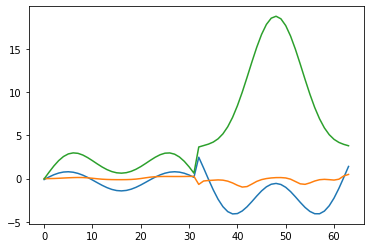

In [65]:
import matplotlib.pyplot as plt

interface_switched = []
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_switched)
    
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, interface_switched)
    
interface_switched = torch.Tensor(interface_switched)

interface_switched_test = []
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_1_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, interface_switched_test)
    
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_switched_test)

interface_switched_test = torch.Tensor(interface_switched_test)

n1 = 0
n2 = 384
n3 = 64

x1 = [i for i in range(n2)]
y11 = [target.tolist()[i][n1] for i in range(n2)]
y12 = [(net(inp) - target).tolist()[i][n1] for i in range(n2)]
#y13 = [(interface_switched - target).tolist()[i][n1] for i in range(n2)]
y13 = [(interface - target).tolist()[i][n1] for i in range(n2)]

x2 = [i for i in range(n3)]
y21 = [target_test.tolist()[i][n1] for i in range(n3)]
y22 = [(net(inp_test) - target_test).tolist()[i][n1] for i in range(n3)]
#y23 = [(interface_switched_test - target_test).tolist()[i][n1] for i in range(n3)]
y23 = [(interface_test - target_test).tolist()[i][n1] for i in range(n3)]
#print(x)

plt.plot(x2, y21)
#plt.plot(x1, y11)

plt.plot(x2, y22)
#plt.plot(x1, y12)

plt.plot(x2, y23)
#plt.plot(x1, y13)